<div style="border:solid Chocolate 2px; padding: 40px">

<b>Любовь, приветствую!</b>

Буду рада с тобой познакомиться. Меня зовут Евгения Маракова и я буду ревьюером твоего проекта. Если ты не против, то предлагаю общаться на "ты":) Если удобнее на "вы", то нет проблем, только скажи об этом.

В процессе работы ты встретишь комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Что они значат, смотри ниже:
    <br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Решение на этом шаге является полностью правильным. У тебя хорошо получается проводить АВ-тестирование и анализировать данные!
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>Необходимо исправить❌:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы😊
    
Свой комментарий помечай так, как показано ниже, тогда нам будет легче вести диалог, а мне выполнить повторную проверку проекта.
    <div class="alert alert-info"> <b>Комментарий студента: </b> </div>
    


 <div class="alert alert-info"> <b>Комментарий студента: Привет! Рада познакомиться :) Женя, спасибо за высокую оценку моей работы. </b> </div>

# Проект: Принятие решений в бизнесе

Цель проекта - провести приоритезацию гипотез, запустить A/B-тест и проанализировать результаты.

Задачи проекта:
    
    - Применить фреймворк ICE и RICE для приоритизации гипотез;
    - проанализировать графики кумулятивных метрик в A/B-тесте;
    - проанализировать выбросы в выборке, аномалии;
    - применить методы статистического анализа для анализа A/B-тестов;
    - принять решение по результатам теста. 


**Часть 1. Приоритизация гипотез.**

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют. 

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Супер, что добавила описание и привела детальный план изучения проекта, так будет легче каждому соореентироваться в работе!
</div>

1.1 Предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
pd.set_option('display.max_colwidth',0)

In [3]:
# загружаем данные о гипотезах из CSV-файла в переменную 
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('hypothesis.csv', sep=',')

In [4]:
#  посмотрим датафрейм 
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Данные загружены верно! Люба, умничка, что применила настройку, так с гипотезами познакомились в полном объеме.
</div>

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных соответствуют значениям столбцов, пропущенных значений нет. Для удобства приведем наименования столбцов к нижнему регистру


In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо, такой формат намного лучше!
</div>

1.2 Рассмотрим метод упорядочивания экспериментов ICE. 
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач: ICE SCORE = Impact * Confidence / Efforts. 

In [7]:
# посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']


In [8]:
# округлим значения ICE до 2 знаков после запятой
hypothesis['ICE'] = round(hypothesis['ICE'],2)

In [9]:
# посмотрим результат, отсортируем их по убыванию приоритета
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Рекомендую избавиться в таблице от больших цифр и округлить значения в колонке ICE до 2 знака после запятой.
</div>

 <div class="alert alert-info"> <b>Комментарий студента: округлила значения ICE до двух знаков после запятой </b> </div>

Итак, на первом месте - 9 гипотеза о запуске акции на скидку в день рождения, также перспективными оказалась 1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" гипотезы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Это прекрасно!
</div>

1.3 Рассмотрим метод упорядочивания экспериментов RICE.
У метода ICE есть модификация RICE (R от англ. reach, «охват»): Reach * Impact * Confidence / Efforts.

In [10]:
# посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [11]:
# округлим значения RICE до 2 знаков после запятой
hypothesis['RICE'] = round(hypothesis['RICE'],2)

 <div class="alert alert-info"> <b>Комментарий студента: округлила значения RICE до двух знаков после запятой </b> </div>

In [12]:
# посмотрим результат, отсортируем их по убыванию приоритета
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично, что вывела таблицу дважды и применила сортировку по одному из фреймворков - так мы более наглядно можем наблюдать различия в их работе!
</div>

**Вывод** Применив фреймворк RICE для приоритизации гипотез, мы видим, что приоритизация гипотез при применении RICE вместо ICE изменилась. Самой приоритетной оказалась гипотеза 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", далее перспективными оказалась гипотезы под номерами 3 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", 1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Так получилось, потому что параметр Reach - охват пользователей по 10-балльной шкале у гипотезы 8 имеет максимальное значение 10 и охватывает хотя бы половину пользователей интернет-магазина.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Совершенно верно!
</div>

**Часть 2. Анализ A/B-теста**


*Описание данных.*
Результаты проведенного A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Файл /datasets/orders.csv:
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста



2.1 Загрузка и обработка данных

In [13]:
# загружаем данные результатов A/B теста и сохраним их в переменные 
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    orders = pd.read_csv('orders.csv', sep=',')
    visitors = pd.read_csv('visitors.csv', sep=',')

In [14]:
# создадим функцию для просмотра общей информации о датафреймах
def get_info(name_df):
    for df in name_df:
        display(df.info())
        display(df.head())
        display(df.describe())
    return    

In [15]:
# передадим функции наименования датафреймов
name_df = [visitors, orders]
get_info(name_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [16]:
# проверим датафреймы на наличие явных дубликатов
print('Количество дубликатов в таблице visitors:', visitors.duplicated().sum())
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())

Количество дубликатов в таблице visitors: 0
Количество дубликатов в таблице orders: 0


Пропущенных значений и явных дубликатов в датафреймах нет, необходимо изменить тип данных в столбцах "date" в таблицах, а также приведем наименования столбцов "transactionId" и "visitorId" к змеиному регистру. 

In [17]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [18]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId': 'visitor_id'}, inplace = True )

In [19]:
# проверяем
get_info(name_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [20]:
# проверим наличие пользователей, которые вошли в обе группы исследования

orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()


group    58
dtype: int64

In [21]:
# список пользователей, которые вошли в обе группы
double_users = orders.groupby('visitor_id').agg({'group' : 'nunique'})\
.reset_index().query('group > 1')['visitor_id'].unique()

In [22]:
# исключаем из датафрейма этих пользователей
orders = orders.query('visitor_id not in @double_users')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Типы данных заменили, убедились в корректности данных, можем двигаться дальше!
</div>

2.2 график кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

    date — дата;
    group — группа A/B-теста (A или B);
    orders — кумулятивное количество заказов на указанную дату в указанной группе;
    buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
    revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
    visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.
Агрегируем значения. Вычислим максимальную дату. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [24]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [25]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия


In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])


In [27]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график кумулятивной выручки по группам. 

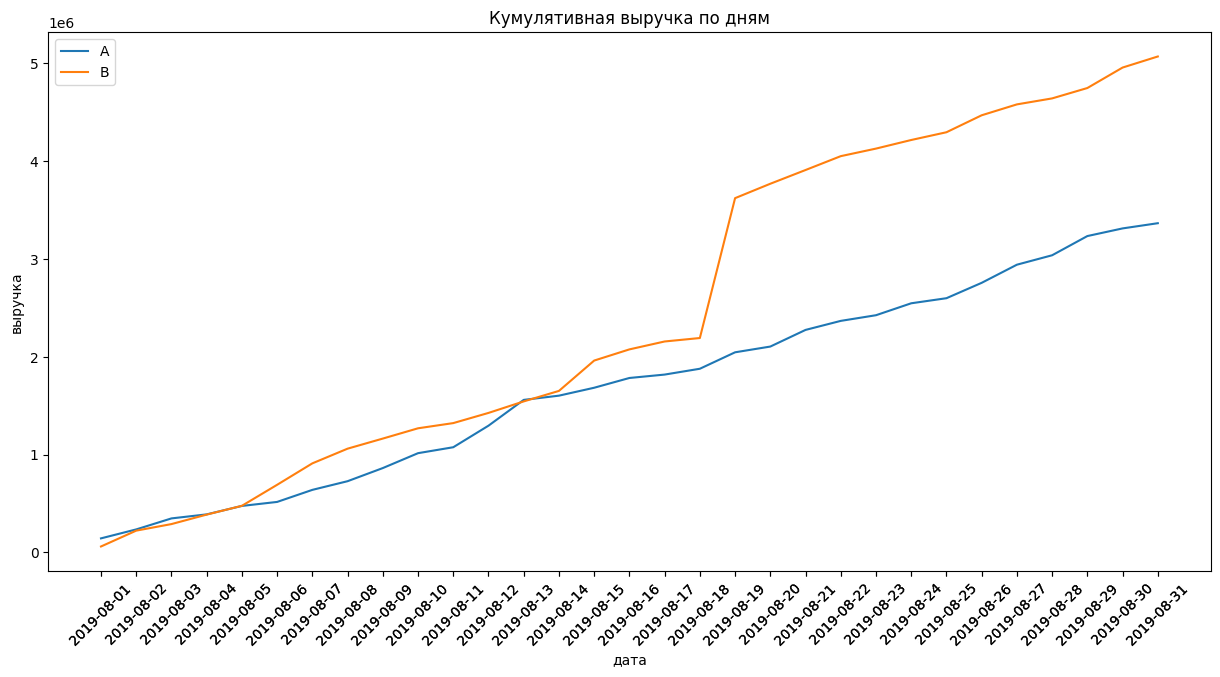

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по дням')
plt.xticks(cumulativeData['date'], rotation=45)
plt.show()

In [30]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


Выручка почти равномерно увеличивается в течение всего теста.  В группе В кумулятивная выручка растет быстрее, чем в группе А.
В нескольких точках заметны всплески, особенно в гуппе В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Согласна, все может быть!
</div>

2.3 Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

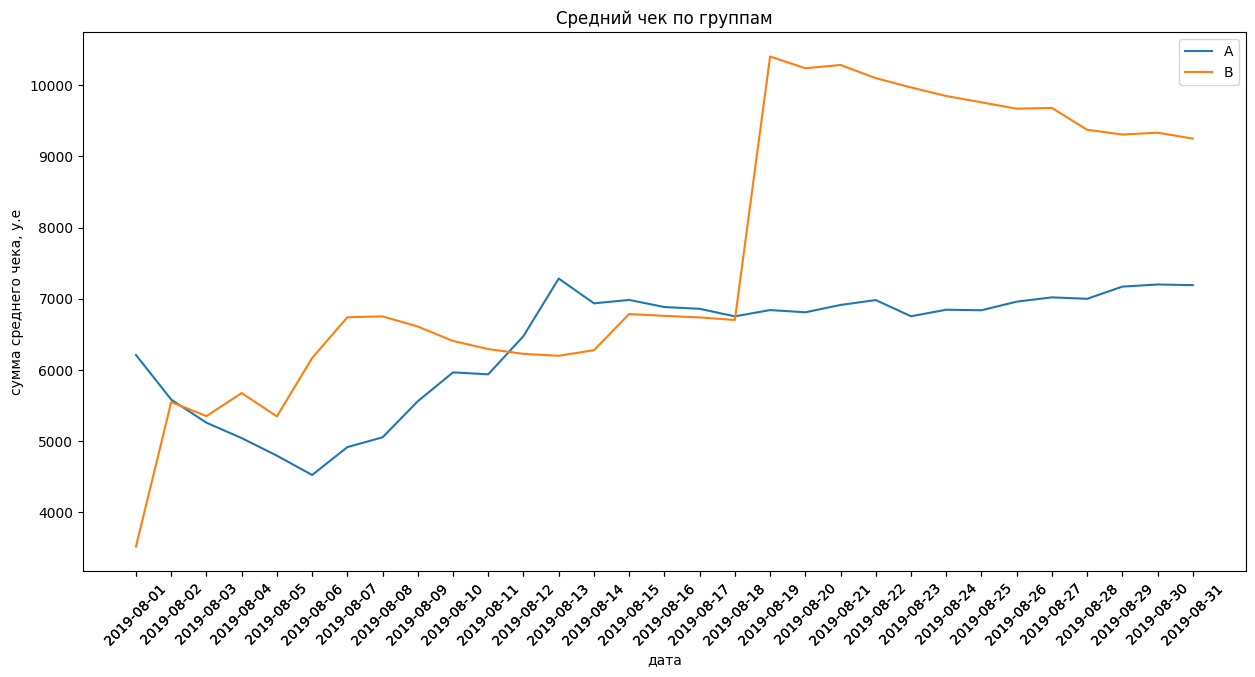

In [31]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('сумма среднего чека, у.е')
plt.title('Средний чек по группам')
plt.xticks(cumulativeData['date'], rotation=45)
plt.show()

 Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B теста попали крупные заказы (резкий всплеск на графике). После этого заметно плавное снижение среднего чека. Нужно больше данных, чтобы прийти к реальному среднему чеку.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Молодец, верно, группа В нестабильна. Необходимо будет учесть этот факт при принятии решения о результатах A/B-теста:)
</div>

2.4 Построим график относительного различия для среднего чека

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


Text(0.5, 1.0, 'График относительного различия для среднего чека')

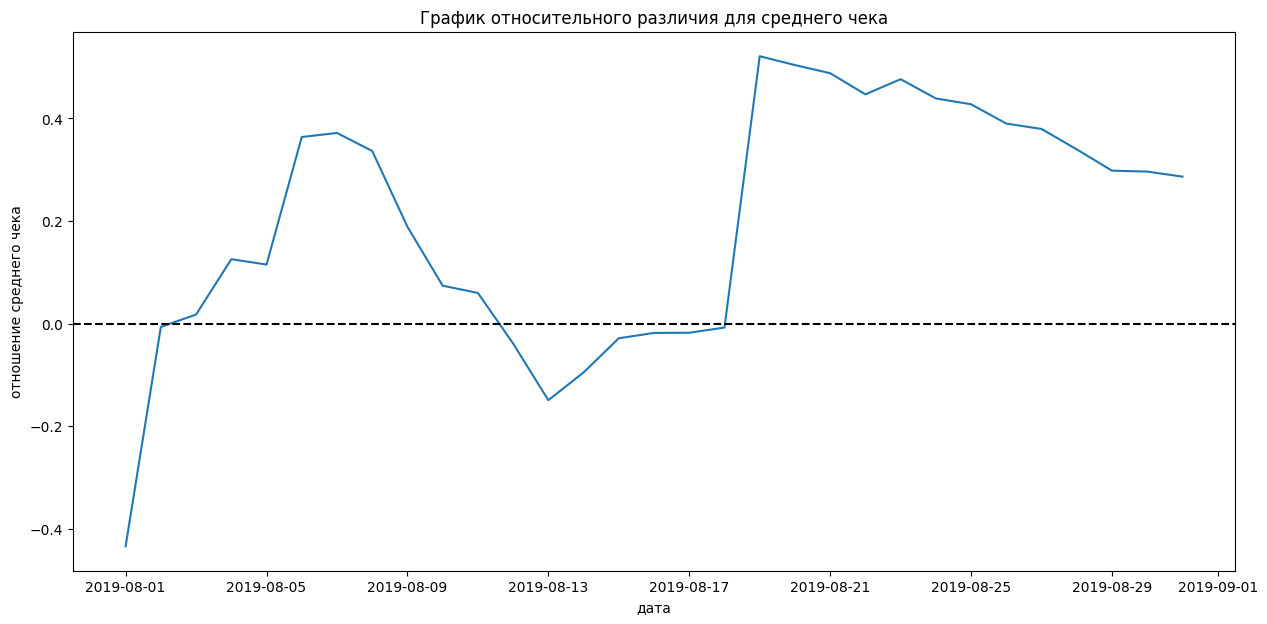

In [33]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('дата')
plt.ylabel('отношение среднего чека')
plt.title('График относительного различия для среднего чека')

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично!
</div>

2.5 Проанализируем график кумулятивного среднего количества заказов на посетителя по группам.

In [34]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


In [35]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


In [36]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


Text(0.5, 1.0, 'График кумулятивного среднего количества заказов на посетителя по группам')

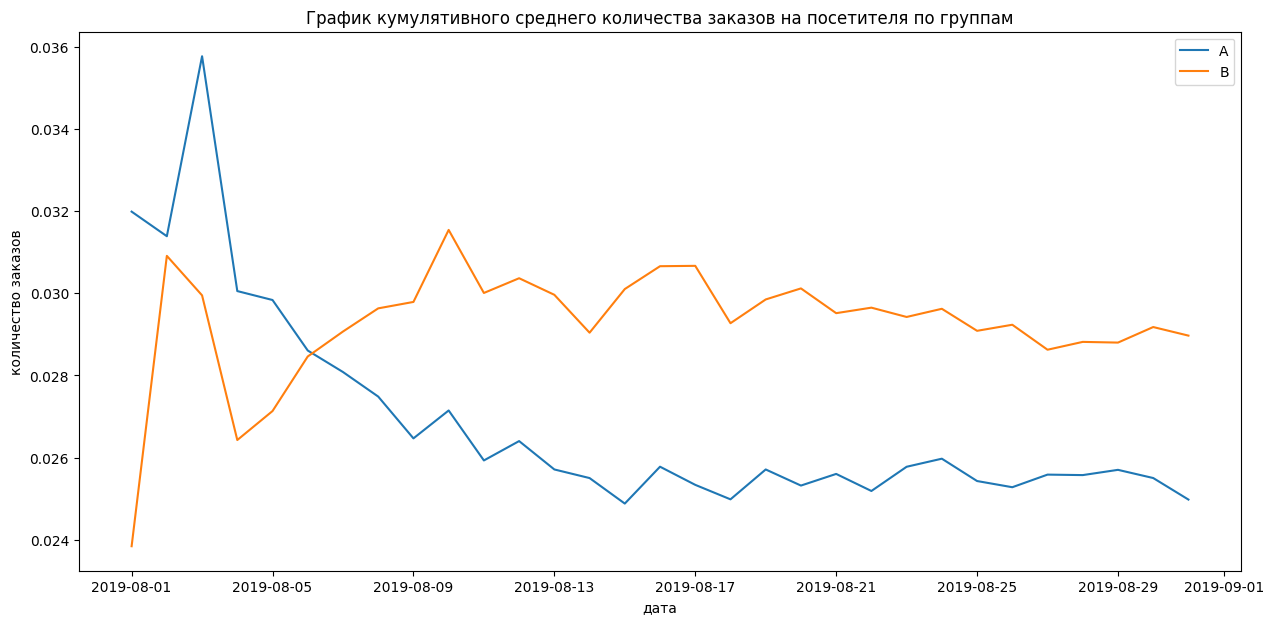

In [37]:
# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')


График кумулятивного среднего количества заказов на посетителя по группам отличается. По группе А он резко падает и устанавливается на плато. По группе В наблюдаются резкие колебания в начале и стабилизация с небольшим снижением далее. 
В целом эта метрика в группе В значительно выше, чем в группе А.
Резкие перепады в начале периода в обеих группах могут быть связаны с влиянием внешних факторов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Умничка, правильно!
</div>

2.6 Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

Text(0.5, 1.0, 'график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

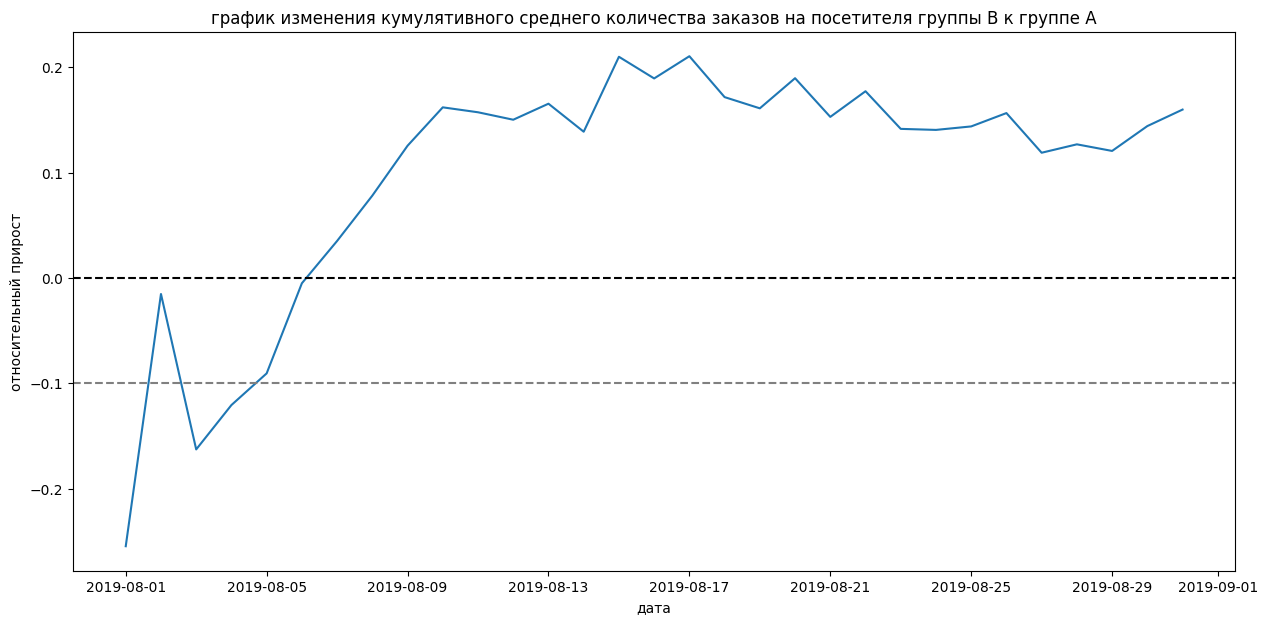

In [38]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
#plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('относительный прирост')
plt.title('график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Люба, здесь можно убрать легенду, по названию понятно, что у нас на графике:)
</div>

 <div class="alert alert-info"> <b>Комментарий студента: Убрала легенду. </b> </div>

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. 
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо, давай посмотрим на аномалии:)
</div>

2.7 Построим точечный график количества заказов по пользователям.

In [39]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']


In [40]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0.5, 1.0, 'частота количества заказов по пользователям')

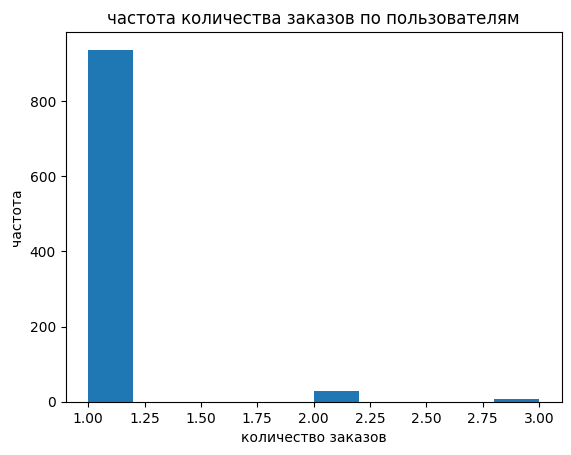

In [41]:
plt.hist(ordersByUsers['orders']) 
plt.xlabel('количество заказов')
plt.ylabel('частота')
plt.title('частота количества заказов по пользователям')

Text(0.5, 1.0, 'точечный гафик частоты количества заказов по пользователям')

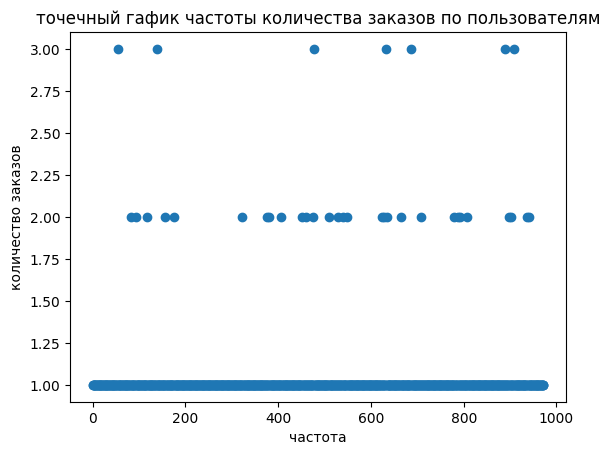

In [42]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('частота')
plt.ylabel('количество заказов')
plt.title('точечный гафик частоты количества заказов по пользователям')

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>Необходимо исправить❌:</b>
А графики забыли оформить. Подпиши, пожалуйста, название и оси у графиков здесь и ниже. 

 <div class="alert alert-info"> <b>Комментарий студента: добавила название графика, подписи осей. </b> </div>

Пользователей, заказавших более 2 раз, совсем мало. Они вполне могут быть аномалиями. 2 заказа - много или мало? ответим на этот вопрос, посчитав 95 и 99 персентили

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Верно!
</div>

2.8 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [43]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([1., 2.])

Не более 1% пользователей совершали более одного заказа. Пользователи очень редко совершают даже вторую покупку. Это не очень хорошо. Примем за аномалию 3 заказа и посмотрим, в какой группе чаще встречаются пользователи, совершившие вторую покупку

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично, идем дальше!
</div>

2.9 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0.5, 1.0, 'Точечный гафик стоимостей заказов')

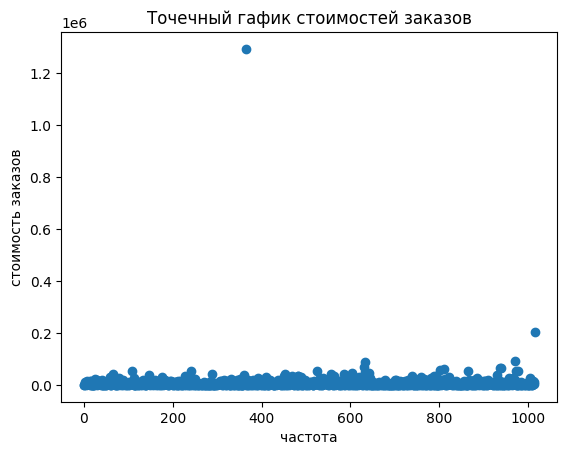

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('частота')
plt.ylabel('стоимость заказов')
plt.title('Точечный гафик стоимостей заказов')

In [45]:
# сделаем срез данных, задав значение revenue больше 200000 у.е.
display(orders.query('revenue > 200000'))


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Всё, как предполагали: есть 2 аномально дорогих заказов.  По графику можно выбрать границу аномальных заказов свыше 200000. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Правильно!
</div>

2.10 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [46]:
display(np.percentile(orders['revenue'], [95, 99]))

array([26785., 53904.])

Не более 5% заказов дороже 26785 у.е. и не более 1% дороже 53904 у.е. Будем считать заказы дороже 53904 аномальными


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Замечательное решение, молодец!
</div>

2.11 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Гипотезы сформулированы верно!
</div>

Создадим таблицу data со следующими названиями столбцов данных:

    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [47]:
# создадим таблицу data
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [48]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [49]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
ordersByUsersA = orders[orders['group'] == 'A']\
    .groupby('visitor_id', as_index=False)\
    .agg({'transaction_id': pd.Series.nunique})
ordersByUsersB = orders[orders['group'] == 'B']\
    .groupby('visitor_id', as_index=False)\
    .agg({'transaction_id': pd.Series.nunique})

In [50]:
# переименуем столбцы
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersB.columns = ['user_id', 'orders']

In [51]:
display(ordersByUsersA.head())
display(ordersByUsersB.head())

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [52]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов 
# пользователя, а пользователям без заказов — нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [61]:
# Выведем p-value для сравнения среднего между группами.  
display('p-value ' "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

'p-value 0.01102'

В sampleA мы сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

In [62]:
# Вычислим относительное различие в среднем между группами. 
display('относительное различие в среднем между группами '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


'относительное различие в среднем между группами 0.160'

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Рекомендую подписать числа, а то сразу не поймешь, что какое означает:)
</div>

 <div class="alert alert-info"> <b>Комментарий студента: добавила подписи </b> </div>

P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. На основе анализа сырых данных можно сказать, что в среднем количестве заказов есть статистически значимые различия. Относительный прирост среднего количества заказов группы B к конверсии группы А составил 16%

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо!
</div>

2.13 Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [63]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
display('p-value ' '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


'p-value 0.829'

In [64]:
# А ещё найдём относительные различия в среднем чеке между группами:
display('относительные различия в среднем чеке между группами ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


'относительные различия в среднем чеке между группами 0.287'

P-value 0.83 - больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие в среднем чеке между группами составило 29%. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Согласна!
</div>

2.14 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 


Приступаем к подготовке очищенных от аномалий данных.
Напомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904 у.е. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя. 
Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём  менее 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.


In [65]:
# Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

In [66]:
# и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. 
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']

In [67]:
# Объединим их в таблице abnormalUsers, удалив дубликаты, отсортируем по возрастанию. 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [68]:
abnormalUsers.head(10)

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
58      611059232
751     689129267
1137    759473111
77      787824685
654     816783716
dtype: int64

Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

In [69]:
# Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах 
# — не включая аномальных пользователей. 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [70]:
# Выведим p-value для сравнения среднего количества заказов между очищенными группами. 
display('p-value ''{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

'p-value 0.00971'

In [71]:
# Выведим относительный прирост среднего количества заказов очищенной группы B
display('относительный прирост среднего количества заказов очищенной группы B ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'относительный прирост среднего количества заказов очищенной группы B 0.187'

Как и в случае с сырыми данными, статистичиская значимость достигнута. Группа В значительно лучше группы А

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Супер, двигаемся дальше!
</div>
    

2.15 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [73]:
# Выведем p-value для сравнения средних чеков между очищенными группами. 
display('p-value '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


'p-value 0.741'

In [74]:
# Выведите относительный прирост среднего чека очищенной группы B
display('относительный прирост среднего чека очищенной группы B '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'относительный прирост среднего чека очищенной группы B -0.027'

P-value 0.741 - больше 0.05 - статистически значимых отличий в среднем чеке между группами по прежнему нет. Относительное различие в среднем чеке между группами составило - 3%, т.е. средний чек в группе В снизился на 3%


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично!
</div>
    

Вот результаты решённых задач:

    Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
    По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимого различия нет.
    График различия конверсии между группами сообщает, что результаты группы B лучше группы A
    График различия среднего чека колеблется в течение всего периода.


По результатам теста можно сделать вывод, что количество заказов увеличивается, выручка растет, даже при небольшом снижении среднего чека.
Отсюда принимаем решение остановить тест, зафиксировать победу группы В.



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Решение на этом шаге является полностью правильным. Ты здорово разобралась во влиянии выбросов на результаты сравнения средних значений и отметила преимущество статистического теста при интерпретации результатов.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
Люба, давай подведем итоги. Ты большая молодец, что старалась и проделала такую большую работу. Мне понравилось, что ты наполнила проект развернутыми выводами и наглядно продемонстрировала каждое задание:) 
    
    Разберем над чем стоит поработать:
    
    1. Оформить графики.
    
    2. Рекомендую:
    - округлить значения в колонке ICE;
    - подписать p-value и статистическую значимость. 
    
    Пересмотри работу и исправь ошибки. Обязательно пиши, если я могу тебе еще чем-то помочь. Удачи!)
  